### Importing Libraries

In [36]:
import numpy as np      # type:ignore
import random
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
import itertools

## **Gradient Descent**
This is an interative method to get faster convergence of the learning algorithm

![Gradient Descent](https://miro.medium.com/proxy/1*f9a162GhpMbiTVTAua_lLQ.png)

## Dataset

In [ ]:
np.random.randint(-10, 10)

In [ ]:
multiplier = np.random.random()
print(multiplier)

records = 50
X, y = [], []
for r in range(records):
    X.append(r)
    y.append(multiplier*r + np.random.randint(-3, 3))

plt.scatter(X, y, marker='.')
plt.show()

df = pd.DataFrame({'x': X, 'y':y})

In [ ]:
df.to_csv('data.csv')

## Reading the saved dataset

In [2]:
df = pd.read_csv('data.csv')
df.head()

,x,y
0,0,-2.000000
1,1,0.489733
2,2,0.979466
3,3,-0.530801
4,4,-0.041069


In [11]:
class Neuron:
    '''
    Class to implement the functionality of a sigmoid neuron
    '''
    def __init__(self, inp=[], labels=[]):
        self.mappoints = []
        # self.inputs = np.transpose(np.array(inp))
        if len(inp) > 0:
            self.inputs = np.ones((len(inp), 2))
            # print(self.inputs[:, :-1].shape, np.expand_dims(np.array(inp), axis=1).shape)
            self.inputs[:, :-1] = np.expand_dims(np.array(inp), axis=1)
        self.labels = np.array(labels)

        print(f"Inputs: Shape - {self.inputs.shape if len(self.inputs) > 0 else None} ")
        print(f"Label: Shape - {self.labels.shape  if len(self.labels) > 0 else None} ")
        print()

    @staticmethod
    def sigmoid(x=[]):
        return 1 / (1 - np.exp(-1*x))

    def initialize_weights(self):
        self.weights = np.array([random.random() for _ in range(len(self.inputs[0]))])
        print(f"Weights initialised to {self.weights}\n\n")
    
    def visualize_gradient(self):
        plt.figure(num=1, figsize=(6, 8))
        ax = plt.axes(projection ='3d')
        ax.view_init(60, 35)
        
        # Plotting loss curve
        X, Y = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))    # (Weight space, Bias space)
        # weights = np.array([])

        for _ in range(len(X[0])):
            tmp = np.hstack([X[:, _].reshape(-1, 1), Y[:, _].reshape(-1, 1)])
            if not len(weights):
                weights = tmp
            else:
                weights = np.vstack((weights, tmp))
        
        # y_preds = [self.get_prediction(weights=weight) for weight in weights]
        # Z = []
        # for ind in len(weights):
        #     Z.append(self.get_loss(method='rmse', y_actual=self.labels, y_predict=y_preds[ind]))
        # ax.contour3D(X, Y, Z)

        # Plotting selected points
        for x, y, z in self.mappoints:
            ax.scatter(x, y, z)
        plt.show()

    def get_prediction(self, X=[], weights=[]):
        X = X if any(X) else self.inputs
        weights = weights if any(weights) else self.weights
        
        if len(X[0]) != len(self.inputs[0]):
            bias = np.ones((len(X), 1))
            X = np.hstack((X, bias))
        
        weighted_sum = np.transpose(weights) @ np.transpose(X)
        return np.array(list(map(self.sigmoid, weighted_sum)))
    
    def get_loss(self, method, y_actual=None, y_predict=None):
        loss = []
        y_actual = y_actual if y_actual else self.labels
        y_predict = y_predict if y_predict else self.get_prediction()

        if method == 'rmse':
            loss = sqrt(sum(list(map( lambda x: x**2, y_actual - y_predict))) / len(y_actual))
            self.mappoints.append([self.weights[0], self.weights[-1], loss])
        elif method == 'cross_entropy':
            for y_act, y_pred in zip( y_actual, y_predict ):
                print(y_act, y_pred)
                # Assuming y_actual - one hot encoded vector and y_predict - probability distribution
                actual_label = np.where(y_act == 1)[0][0]
                loss += -1*np.log2(y_pred[actual_label])
        
        return loss

    def has_converged(self, loss_method='rmse', threshold=0.3):
        loss = self.get_loss(method=loss_method)        
        return loss < threshold
    
    def get_update(self, lr=0.01, method='sgd'):
        if method == 'sgd':     # Simple Gradient Descent
            '''
                Updation Rule used: 
                w[t+1] = w[t] - η*Δw
                b[t+1] = b[t] - η*Δb
            '''
            y_predict = self.get_prediction()
            updates = (2 * ((y_predict - self.labels) * y_predict * (1 - y_predict))).reshape(((len(self.inputs), -1)))       # 1D List
            update_w, update_b = [], np.array(sum(lr*updates))
            for update,inputs in zip(updates, self.inputs[:, :-1].reshape((len(self.inputs), -1))) : 
                # print(f"Internal: {update.shape}, {inputs.shape}, {(np.dot(update, inputs)).shape}")
                update_w.append(lr * np.dot(update, inputs))
            update_w = np.sum(np.array(update_w).reshape((len(self.inputs), -1)), axis=0)

        return np.hstack((update_w, update_b))

    def fit(self, X=[], y=[], epochs=5, learning_rate=0.1):
        X, y = np.array(X), np.array(y)
        # print(self.inputs==X)
        if len(X) and len(y) and not all(self.inputs==X):
            bias = np.ones((len(X), 1))
            self.inputs = np.hstack((X, bias))
            self.labels = y
        
        self.initialize_weights()
        epoch_counter = 0

        while not self.has_converged() and epoch_counter < epochs:
            epoch_counter += 1
            print(f"\nEpoch {epoch_counter}:")
            self.visualize_gradient()
            self.weights += self.get_update(lr=learning_rate)     # Weights and bias not updated seperately as bias is treated as a part of the weights
        else:
            print("Training completed.....")
            print(self.weights)
        

In [49]:
A1, A2 = np.array([i for i in range(5)]), np.array([i for i in range(5)])
print(ax1, ax2)
weights = np.array([])

for _ in range(len(X[0])):
    tmp = np.hstack([A1[:, _].reshape(-1, 1), A2[:, _].reshape(-1, 1)])
    if not len(weights):
        weights = tmp
    else:
        weights = np.vstack((weights, tmp))

for w in weights:
    print(f"Weight: {w[0]}, Bias: {w[1]}")

[0 1 2 3 4] [0 1 2 3 4]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]] [[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
Weight: 0, Bias: 0
Weight: 0, Bias: 1
Weight: 0, Bias: 2
Weight: 0, Bias: 3
Weight: 0, Bias: 4
Weight: 1, Bias: 0
Weight: 1, Bias: 1
Weight: 1, Bias: 2
Weight: 1, Bias: 3
Weight: 1, Bias: 4
Weight: 2, Bias: 0
Weight: 2, Bias: 1
Weight: 2, Bias: 2
Weight: 2, Bias: 3
Weight: 2, Bias: 4
Weight: 3, Bias: 0
Weight: 3, Bias: 1
Weight: 3, Bias: 2
Weight: 3, Bias: 3
Weight: 3, Bias: 4
Weight: 4, Bias: 0
Weight: 4, Bias: 1
Weight: 4, Bias: 2
Weight: 4, Bias: 3
Weight: 4, Bias: 4


In [46]:
weights = []
self_weights = np.array([0.01430549, 0.06842723])
w, b = np.linspace(-50, 50, 5), np.linspace(-50, 50, 5)
print(weights)
np.meshgrid(w, b)

[]


[array([[-50., -25.,   0.,  25.,  50.],
        [-50., -25.,   0.,  25.,  50.],
        [-50., -25.,   0.,  25.,  50.],
        [-50., -25.,   0.,  25.,  50.],
        [-50., -25.,   0.,  25.,  50.]]),
 array([[-50., -50., -50., -50., -50.],
        [-25., -25., -25., -25., -25.],
        [  0.,   0.,   0.,   0.,   0.],
        [ 25.,  25.,  25.,  25.,  25.],
        [ 50.,  50.,  50.,  50.,  50.]])]

## **Simple Gradient Descent**

Inputs: Shape - (50, 2) 
Label: Shape - (50,) 

Weights initialised to [0.01430549 0.06842723]



Epoch 1:


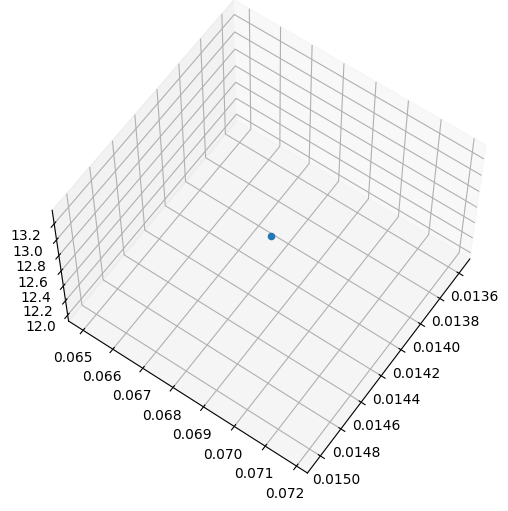


Epoch 2:


c:\Users\prapt\Desktop\Deep Learning\DL_Basics\DL_WS\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in exp


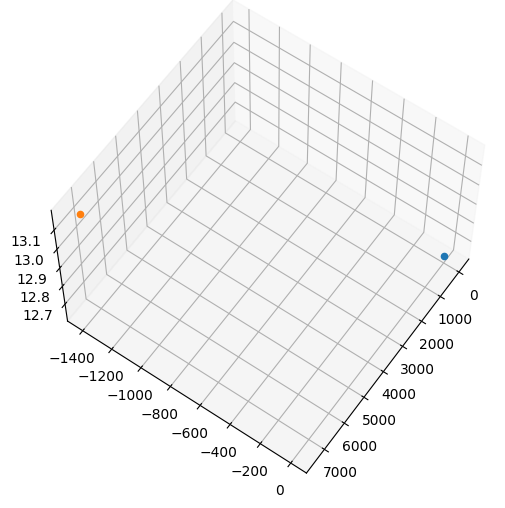


Epoch 3:


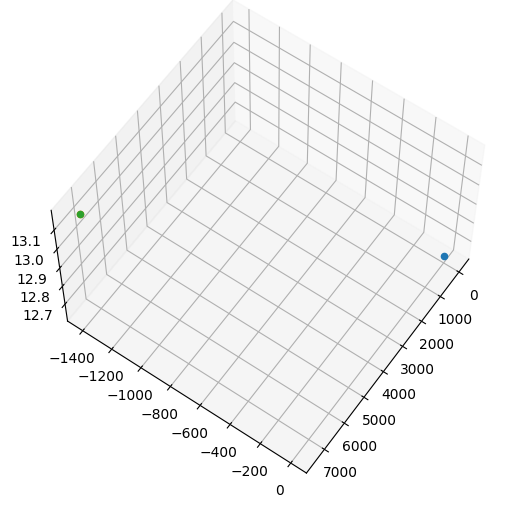


Epoch 4:


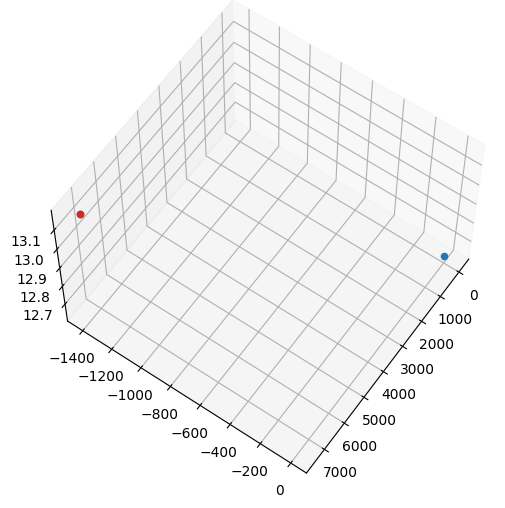


Epoch 5:


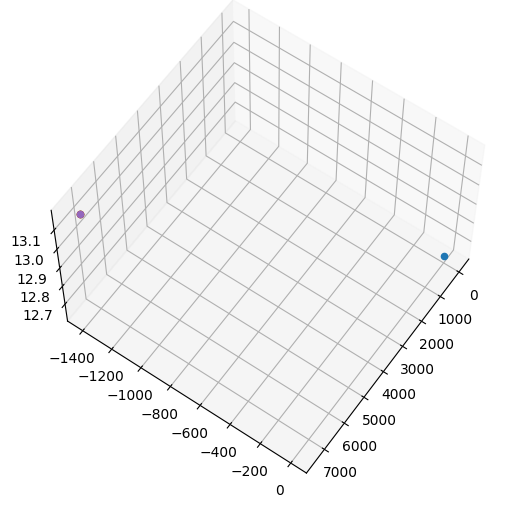

Training completed.....
[ 7357.00276998 -1403.11843016]


In [12]:
neuron = Neuron(inp=df['x'], labels=df['y'])
neuron.fit()

## **Momentum based Gradient Descent**

## **Nesterov Accelerated Gradient Descent**

## **Stochastic Gradient Descent**

## **Mini-Batch Gradient Descent**

## **Gradient Descent with Adaptive Learning Rate (AdaGrad)**

## **RMS Prop**

## **ADAM**